In [1]:
import numpy as np
import random as random
import math
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [50]:
# part a

def findMAPestimate(file):
    theta,posterior = np.loadtxt(file, delimiter=",", unpack=False)
    ind_i = np.argmax(posterior)
    theta_max = theta[ind_i]
    print('When kposter(theta,y) is a maximum, theta = {}'.format(theta_max))
    return theta_max

In [51]:
findMAPestimate('kpost.out')

When kposter(theta,y) is a maximum, theta = 0.131313131313


0.13131313131299999

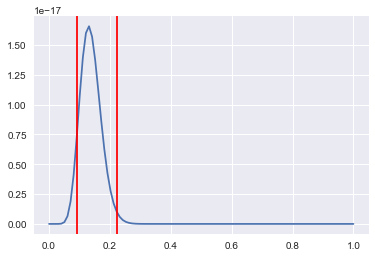

In [54]:
theta,posterior = np.loadtxt('kpost.out', delimiter=",", unpack=False)
posterior


total_a = np.trapz(posterior,x=theta)
    
# build up trapz in theta
integrals = np.array([np.trapz(posterior[0:i]/total_a,x=theta[0:i]) for i in range(len(posterior))])
integrals_theta_1 = abs(integrals - (2.5/100))
theta_1 = theta[np.argmin(integrals_theta_1)]

integrals_theta_2 = abs(integrals - (97.5/100))
theta_2 = theta[np.argmin(integrals_theta_2)]


plt.figure()
plt.plot(theta,posterior)
plt.axvline(theta_1,color='r')
plt.axvline(theta_2,color='r')

mean_theta = np.mean(theta)
std_theta = np.std(theta)


In [49]:
# part c

def findCredibleInterval(file):
    theta,posterior = np.loadtxt(file, delimiter=",", unpack=False)
    total_a = np.trapz(posterior,x=theta)
    
    # build up trapz in theta
    integrals = np.array([np.trapz(posterior[0:i]/total_a,x=theta[0:i]) for i in range(len(posterior))])
    
    # find closest value for 2.5%
    integrals_theta_1 = abs(integrals - (2.5/100))
    theta_1 = theta[np.argmin(integrals_theta_1)]

    # find closest value for 97.5% 
    integrals_theta_2 = abs(integrals - (97.5/100))
    theta_2 = theta[np.argmin(integrals_theta_2)]

    
findCredibleInterval('kpost.out')


IndexError: invalid index to scalar variable.

In [58]:
# part d 

def findMeanEstimate(file):
    theta,posterior = np.loadtxt(file, delimiter=",", unpack=False)
    
    mean_theta = np.mean(theta)
    std_theta = np.std(theta)
    print('The mean of theta is {}, the standard deviation of theta is {}'.format(mean_theta,std_theta))
    


In [59]:
findMeanEstimate('kpost.out')


The mean of theta is 0.500000000000005, the standard deviation of theta is 0.29157646512864027


In [9]:
%qtconsole